## Compute spliced/unspliced ratios as a QC metric

In [6]:
import sys,os
import scanpy as sc
import pandas as pd
import numpy as np
import scvelo as scv

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
## r2py setup
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [35]:
%load_ext rpy2.ipython

In [36]:
%%R
library(tidyverse)
library(reshape2)
library(patchwork)

remove_x_axis <- function(){
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank())  
}

remove_y_axis <- function(){
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.title.y = element_blank())  
}

### Load spliced/unspliced counts for RNA velocity

We load and save just the samples that contain ILC cells

In [2]:
indir = '/nfs/team205/ed6/data/Fetal_immune/tic-908/'

In [3]:
def convert_obs_name(obs_name):
    obs_name = "_".join(obs_name.split(":")).rstrip("x")
    return(obs_name)

def read_velocyto(indir, file):
    adata = scv.read(indir + file + ".loom", cache=False)
    adata.obs_names = [convert_obs_name(x) for x in adata.obs_names]
    return(adata)

velo_files = [x.split(".loom")[0] for x in os.listdir(indir)]

In [69]:
f=velo_files[1]

In [70]:
adata = read_velocyto(indir, f)
adata.var_names_make_unique()
adata.obs_names = ["-".join(x.split("_")) for x in adata.obs_names]
adata.obs['total_counts_spliced'] = np.array(adata.layers['spliced'].sum(1)).flatten()
adata.obs['total_counts_unspliced'] = np.array(adata.layers['unspliced'].sum(1)).flatten()
del adata.layers["ambiguous"]
del adata.layers["matrix"]
#     scvelo_adata = scvelo_adata.concatenate(adata)
# all_adatas.append(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


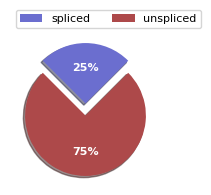

In [71]:
scv.pl.proportions(adata)

In [145]:
all_adatas = []
for f in velo_files:
    print(f'Reading {f}')
    adata = read_velocyto(indir, f)
    adata.var_names_make_unique()
    adata.obs_names = ["-".join(x.split("_")) for x in adata.obs_names]
    adata.obs['total_counts_spliced'] = np.array(adata.layers['spliced'].sum(1)).flatten()
    adata.obs['total_counts_unspliced'] = np.array(adata.layers['unspliced'].sum(1)).flatten()
    del adata.layers["ambiguous"]
    del adata.layers["matrix"]
    obs_df = adata.obs.copy()
    all_adatas.append(obs_df)

Reading FCAImmP7292030


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803021


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528294


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159190


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862085


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555851


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277555


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862096


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555854


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352191


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7536759


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985393


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579215


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277566


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159186


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096695


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292028


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803025


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851896


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7536762


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCA_gut8015058


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579226


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579232


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862092


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7241243


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159184


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964509


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985394


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579227


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555859


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179364


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7241242


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352190


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352193


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277564


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316893


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462237


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198631


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555857


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803031


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCA_gut8015061


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096692


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579225


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964500


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7536761


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316887


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862087


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277565


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316889


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7504913


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316886


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179366


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198435


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316898


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096687


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198628


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198630


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159189


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803040


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316892


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8102304


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964499


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528295


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316896


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803033


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179363


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803027


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292033


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555850


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555849


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862086


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198432


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159183


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462244


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851894


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528285


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862089


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096690


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528296


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555846


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964506


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198633


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179370


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985390


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179369


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579223


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579220


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851893


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555847


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198635


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCA_gut8015060


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316901


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579228


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198629


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277560


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462241


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803041


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964503


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579216


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579222


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579233


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579214


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964510


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803037


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579224


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803032


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803034


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803017


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292035


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277563


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985395


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7536760


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851895


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803036


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803029


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803019


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555861


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862095


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803043


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555858


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096696


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292034


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316891


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528286


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316900


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964508


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528288


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555856


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803022


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851892


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851897


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803023


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528292


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292032


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964504


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352192


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179367


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579212


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528287


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179368


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7241241


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277561


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528282


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7536758


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462243


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096689


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277567


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579217


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159187


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803035


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316890


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555852


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7504910


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528280


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462239


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277559


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277557


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985391


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555860


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862084


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCA_gut8015059


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803016


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985389


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277554


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528290


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7504911


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096686


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964501


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555853


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579213


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851891


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159185


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528284


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277553


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462242


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579211


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528293


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579219


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277562


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803018


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803039


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277556


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277552


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352194


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555855


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803028


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964502


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803020


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528279


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964505


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCA_gut8015057


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862090


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555848


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579218


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316895


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316899


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316897


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159182


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7851890


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198632


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096688


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462240


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292029


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352195


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579230


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S7985392


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7292031


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579221


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352196


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316894


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528281


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803024


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7277558


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading Human_colon_16S8159188


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528291


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7241240


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579210


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7352189


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528289


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198634


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862094


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862091


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7179365


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579231


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803030


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803042


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7504912


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7528283


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096694


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198434


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7198433


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096691


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7555862


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862088


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7862093


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7462238


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7316888


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7964507


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7504909


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP8096693


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803026


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7579229


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading FCAImmP7803038


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [146]:
df = pd.concat(all_adatas)
df['sample'] = ['-'.join(x[:-1]) for x in df.index.str.split('-')]
df['sample'] = df['sample'].astype("str")

<AxesSubplot:xlabel='total_counts_spliced', ylabel='total_counts_unspliced'>

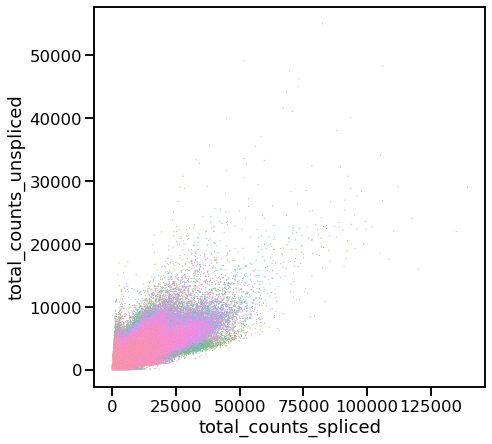

In [154]:
plt.rcParams['figure.figsize'] = [7,7]
sns.scatterplot(data=df,x='total_counts_spliced', y='total_counts_unspliced', hue='sample', s=1, legend=False)

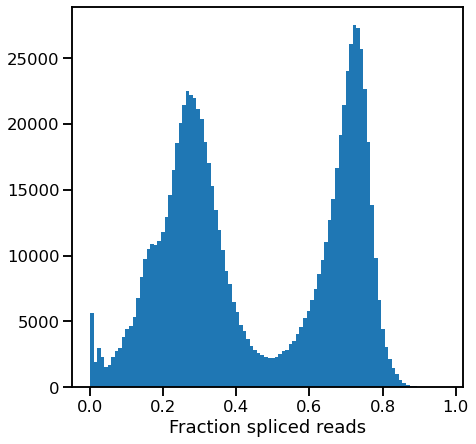

In [155]:
df['frac_unspliced_reads'] = df['total_counts_unspliced']/(df['total_counts_unspliced']+df['total_counts_spliced'])
plt.hist(df['frac_unspliced_reads'], bins=100);
plt.xlabel("Fraction spliced reads");

In [81]:
anno_obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv',index_col=0)

In [149]:
df['in_PFI'] = df.index.isin(anno_obs.index)

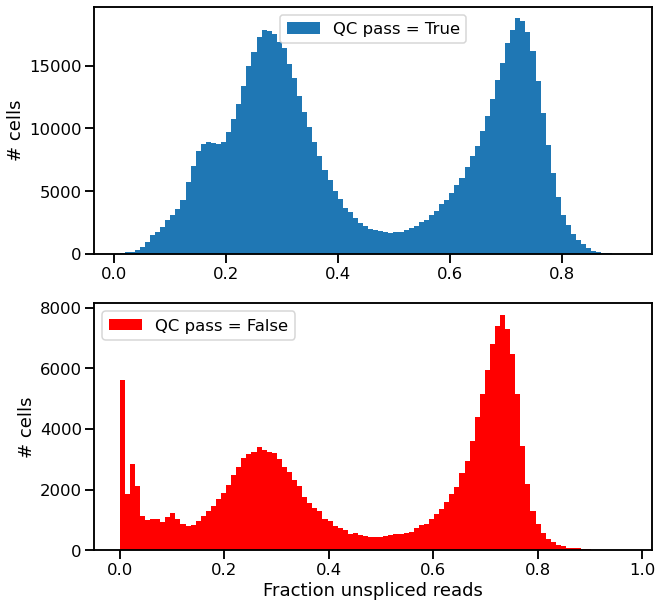

In [198]:
plt.rcParams['figure.figsize'] = [10,10]
sns.set_context("talk")
plt.subplot(2,1,1);
plt.hist(df[df['in_PFI']]['frac_unspliced_reads'], bins=100, label='QC pass = True');
plt.ylabel("# cells");
plt.legend();
plt.subplot(2,1,2);
plt.hist(df[~df['in_PFI']]['frac_unspliced_reads'], bins=100, color='red', label='QC pass = False');
plt.ylabel("# cells");
plt.legend();
plt.xlabel("Fraction unspliced reads");

In [151]:
df['lib_size'] = np.log10(df['total_counts_spliced'] + df['total_counts_unspliced'])

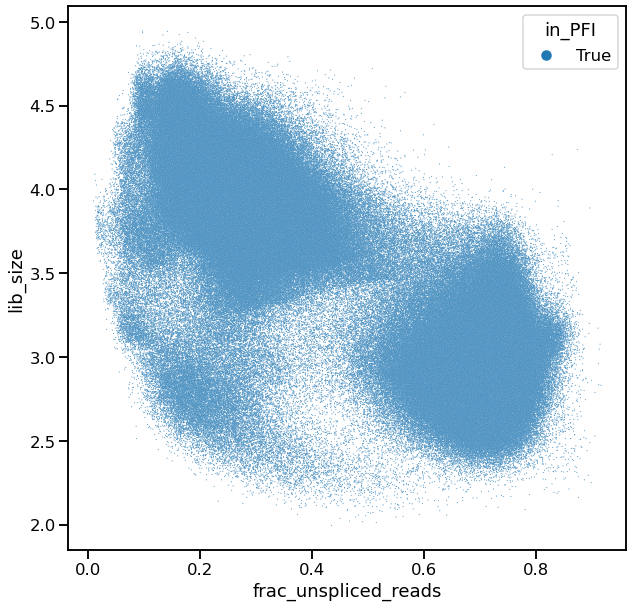

<AxesSubplot:xlabel='frac_unspliced_reads', ylabel='lib_size'>

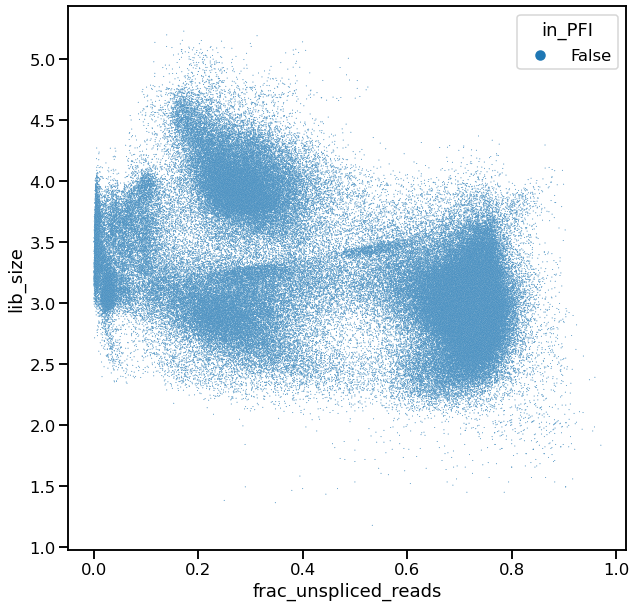

In [158]:
sns.scatterplot(data=df[df['in_PFI']],x='frac_unspliced_reads', y='lib_size', hue='in_PFI', s=1, legend=True);
plt.show()
sns.scatterplot(data=df[~df['in_PFI']],x='frac_unspliced_reads', y='lib_size', hue='in_PFI', s=1, legend=True)

In [358]:
df['annotation'] = np.nan
df.loc[df['in_PFI'], 'annotation'] = anno_obs.loc[df[df['in_PFI']].index]['anno_lvl_2_final_clean']
df['mito'] = np.nan
df.loc[df['in_PFI'], 'mito'] = anno_obs.loc[df[df['in_PFI']].index]['mito']
df['organ'] = np.nan
df.loc[df['in_PFI'], 'organ'] = anno_obs.loc[df[df['in_PFI']].index]['organ']
df['method'] = np.nan
df.loc[df['in_PFI'], 'method'] = anno_obs.loc[df[df['in_PFI']].index]['method']
df['sort'] = np.nan
df.loc[df['in_PFI'], 'sort'] = anno_obs.loc[df[df['in_PFI']].index]['Sort_id']

In [220]:
## Read annotation groupings
import json
with open('../../metadata/anno_groups.json', 'r') as json_file:
    anno_groups_dict = json.load(json_file)

anno_groups_dict_rev = {x:g for g,a in anno_groups_dict.items() for x in a}
anno_groups_dict_rev = {"_".join(k.split("/")):v for k,v in anno_groups_dict_rev.items()}

df['anno_group'] = [anno_groups_dict_rev[x] if not pd.isna(x) else np.nan for x in df.annotation]

<AxesSubplot:xlabel='frac_unspliced_reads', ylabel='method'>

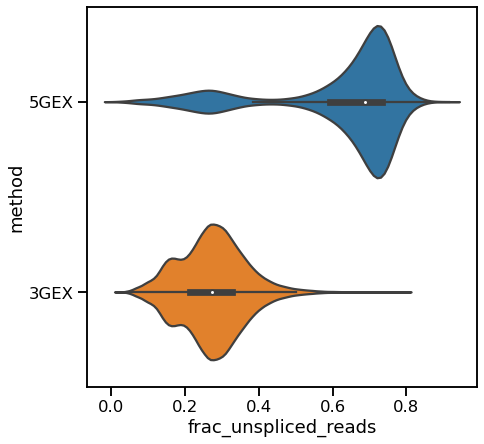

In [171]:
plt.rcParams['figure.figsize'] = [7,7]
sns.violinplot(data=df[df['in_PFI']], x='frac_unspliced_reads', y='method',  orient='h')

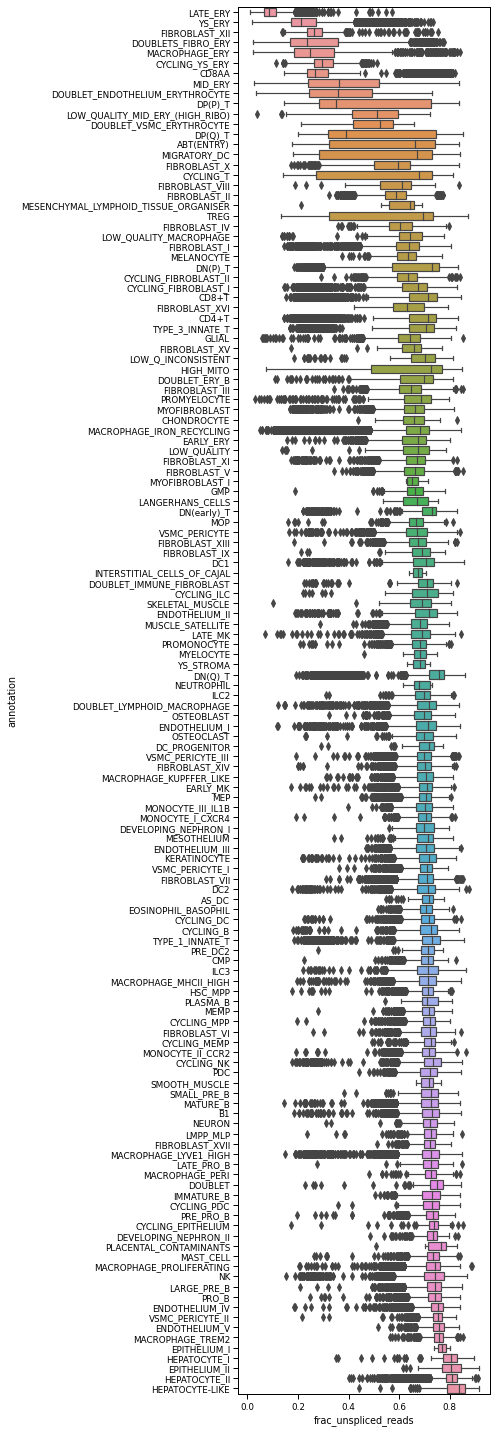

In [361]:
sns.set_context("paper")
plt.rcParams['figure.figsize'] = [7,20]
df_5gex = df[df['method'] == '5GEX']
order_anno_5gex = df_5gex.groupby(['annotation']).mean().sort_values('frac_unspliced_reads').index
sns.boxplot(data=df_5gex, x='frac_unspliced_reads', y='annotation',  orient='h', order=order_anno_5gex)
plt.tight_layout()
plt.savefig('/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/frac_unspliced_5GEX.png')

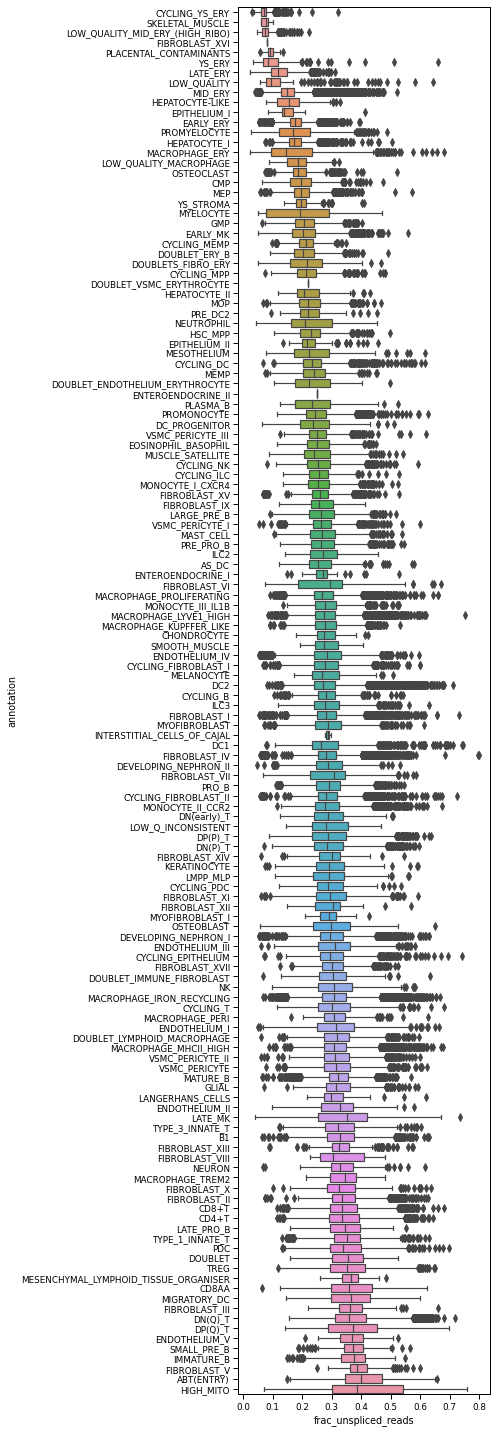

In [362]:
df_3gex = df[df['method'] == '3GEX']
order_anno_3gex = df_3gex.groupby(['annotation']).mean().sort_values('frac_unspliced_reads').index
sns.boxplot(data=df_3gex, x='frac_unspliced_reads', y='annotation',  orient='h', order=order_anno_3gex)
plt.tight_layout()
plt.savefig('/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/frac_unspliced_3GEX.png')

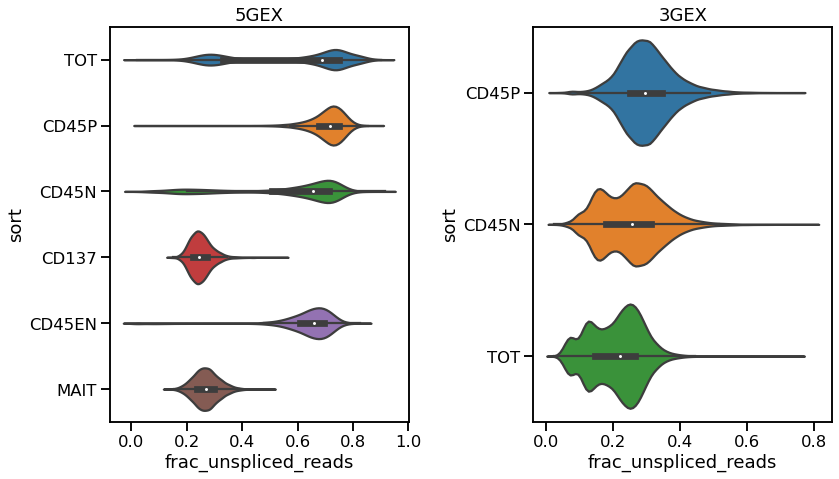

In [368]:
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [12,7]
plt.subplot(1,2,1);
sns.violinplot(data=df_5gex, x='frac_unspliced_reads', y='sort',  orient='h');
plt.title("5GEX");
plt.subplot(1,2,2);
sns.violinplot(data=df_3gex, x='frac_unspliced_reads', y='sort',  orient='h');
plt.tight_layout();
plt.title("3GEX");

In [336]:
mean_3gex = df_3gex.groupby(['annotation']).mean()[['frac_unspliced_reads']]
mean_5gex = df_5gex.groupby(['annotation']).mean()[['frac_unspliced_reads']]

mean_df = pd.concat([mean_5gex, mean_3gex], 1).reset_index()
mean_df.columns = ['anno','frac_unspliced_5GEX', 'frac_unspliced_3GEX']
mean_df['anno_group'] = [anno_groups_dict_rev[x] for x in mean_df['anno']]

anno  frac_unspliced_5GEX  frac_unspliced_3GEX  anno_group
0            ABT(ENTRY)             0.540796             0.402474  NK/T CELLS
1                 AS_DC             0.701038             0.274732     MYELOID
2                    B1             0.715173             0.332217     B CELLS
3                 CD4+T             0.631738             0.347058  NK/T CELLS
4                 CD8+T             0.631146             0.344752  NK/T CELLS
..                  ...                  ...                  ...         ...
133   VSMC_PERICYTE_III             0.693337             0.254079      STROMA
134              YS_ERY             0.232552             0.104015     MYELOID
135           YS_STROMA             0.679011             0.200073     MYELOID
136   ENTEROENDOCRINE_I                  NaN             0.274756      STROMA
137  ENTEROENDOCRINE_II                  NaN             0.249641      STROMA

[138 rows x 4 columns]

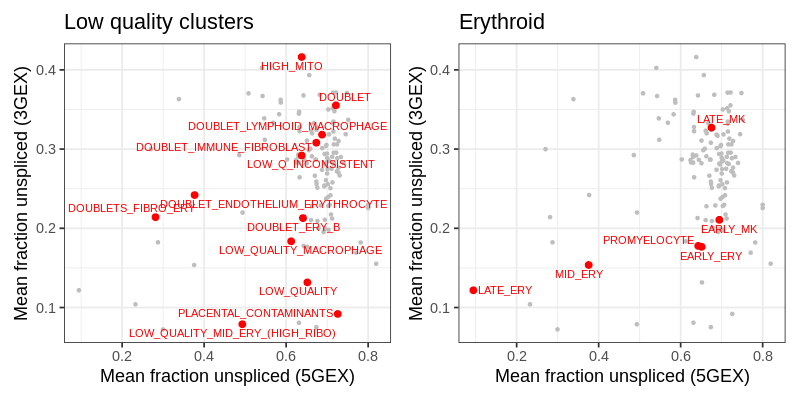

In [347]:
%%R -i mean_df -w 800 -h 400
gr <- "OTHER"
p1 <- mean_df %>%
    ggplot(aes(frac_unspliced_5GEX, frac_unspliced_3GEX)) +
    geom_point(color='grey') +
    geom_point(data=. %>% filter(anno_group=="OTHER"), color='red', size=3) +
    ggrepel::geom_text_repel(data=. %>% filter(anno_group=="OTHER"), aes(label=anno), color='red') +
    theme_bw(base_size=18) +
    ggtitle("Low quality clusters") +
    xlab("Mean fraction unspliced (5GEX)") + ylab("Mean fraction unspliced (3GEX)")
    
p2 <- mean_df %>%
    ggplot(aes(frac_unspliced_5GEX, frac_unspliced_3GEX)) +
    geom_point(color='grey') +
    geom_point(data=. %>% filter(anno_group=="ERYTHROID CELLS"), color='red', size=3) +
    ggrepel::geom_text_repel(data=. %>% filter(anno_group=="ERYTHROID CELLS"), aes(label=anno), color='red') +
    theme_bw(base_size=18) +
    ggtitle("Erythroid") +
    xlab("Mean fraction unspliced (5GEX)") + ylab("Mean fraction unspliced (3GEX)")
    
p1 + p2

<AxesSubplot:xlabel='frac_unspliced_reads', ylabel='organ'>

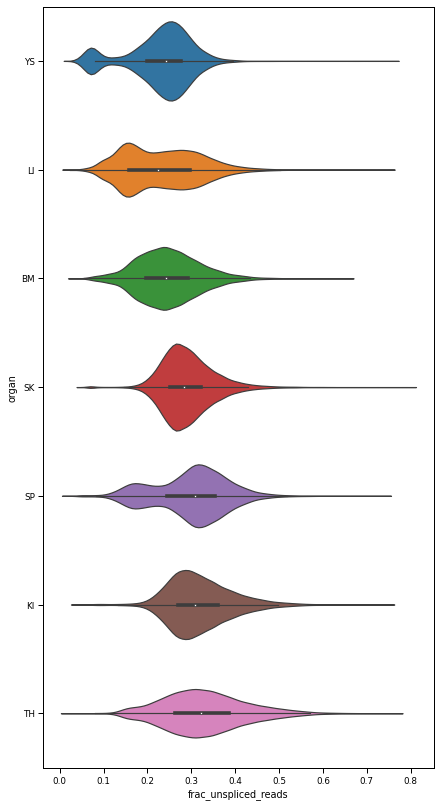

In [177]:
plt.rcParams['figure.figsize'] = [7,14]
order_anno = df_3gex[df_3gex['in_PFI']].groupby(['organ']).mean().sort_values('frac_unspliced_reads').index
sns.violinplot(data=df_3gex, x='frac_unspliced_reads', y='organ',  orient='h', order=order_anno)

<AxesSubplot:xlabel='frac_unspliced_reads', ylabel='organ'>

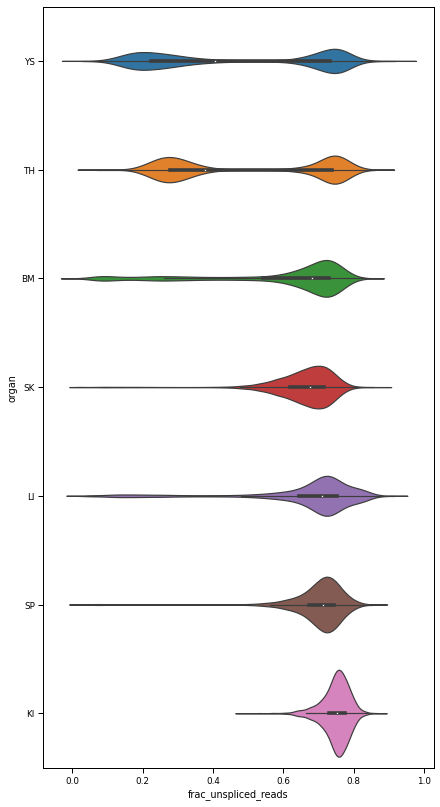

In [178]:
plt.rcParams['figure.figsize'] = [7,14]
order_anno = df_5gex[df_5gex['in_PFI']].groupby(['organ']).mean().sort_values('frac_unspliced_reads').index
sns.violinplot(data=df_5gex, x='frac_unspliced_reads', y='organ',  orient='h', order=order_anno)

No handles with labels found to put in legend.


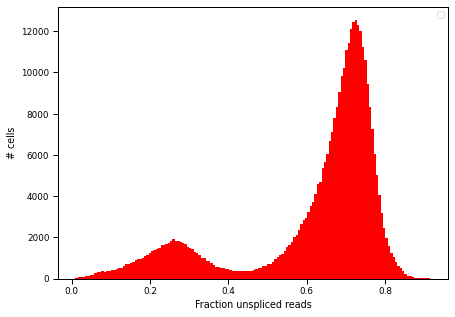

In [252]:
plt.rcParams['figure.figsize'] = [7,5]
plt.hist(df_5gex['frac_unspliced_reads'], bins=150, color='red');
# plt.hist(df_3gex[df_3gex.annotation=='HIGH_MITO']['frac_unspliced_reads'], bins=50, color='blue');
plt.ylabel("# cells");
plt.legend();
plt.xlabel("Fraction unspliced reads");

<AxesSubplot:xlabel='frac_unspliced_reads', ylabel='mito'>

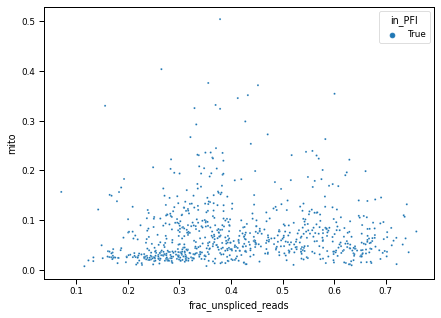

In [251]:
# sns.scatterplot(data=df_3gex,x='frac_unspliced_reads', y='mito', hue='in_PFI', s=4, legend=True)
sns.scatterplot(data=df_3gex[df_3gex.annotation=='HIGH_MITO'],x='frac_unspliced_reads', y='mito', hue='in_PFI', s=4)

In [253]:
adata_emb = sc.read_h5ad('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.HSC_IMMUNE.embedding.h5ad', backed='r')

In [263]:
keep_obs = adata_emb.obs_names[adata_emb.obs_names.isin(df.index)]

In [265]:
adata_emb.obs['frac_unspliced'] = np.nan
adata_emb.obs.loc[keep_obs, 'frac_unspliced'] = df.loc[keep_obs, 'frac_unspliced_reads']

In [287]:
adata_prolif = adata_emb[:,'MKI67']
adata_prolif = adata_prolif.to_memory()
adata_emb.obs['MKI67_expr']= np.log1p(adata_prolif.X.toarray().flatten())

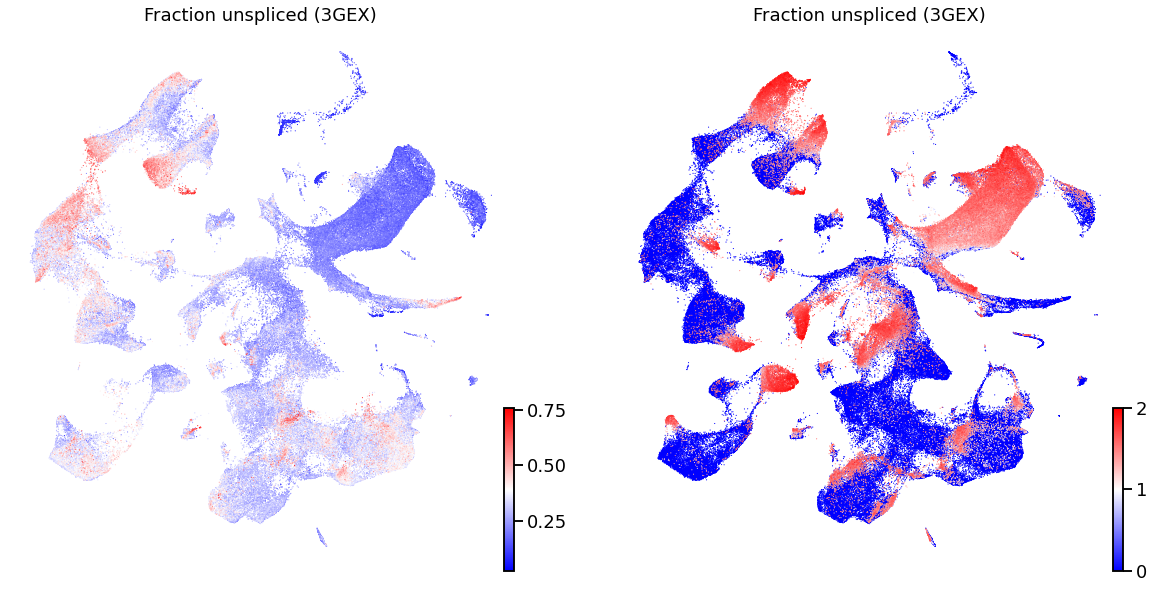

In [370]:
sns.set_context("talk")
plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata_emb[adata_emb.obs['method'] == '3GEX'], color=['frac_unspliced', 'MKI67_expr'], size=5, cmap='bwr', title='Fraction unspliced (3GEX)')

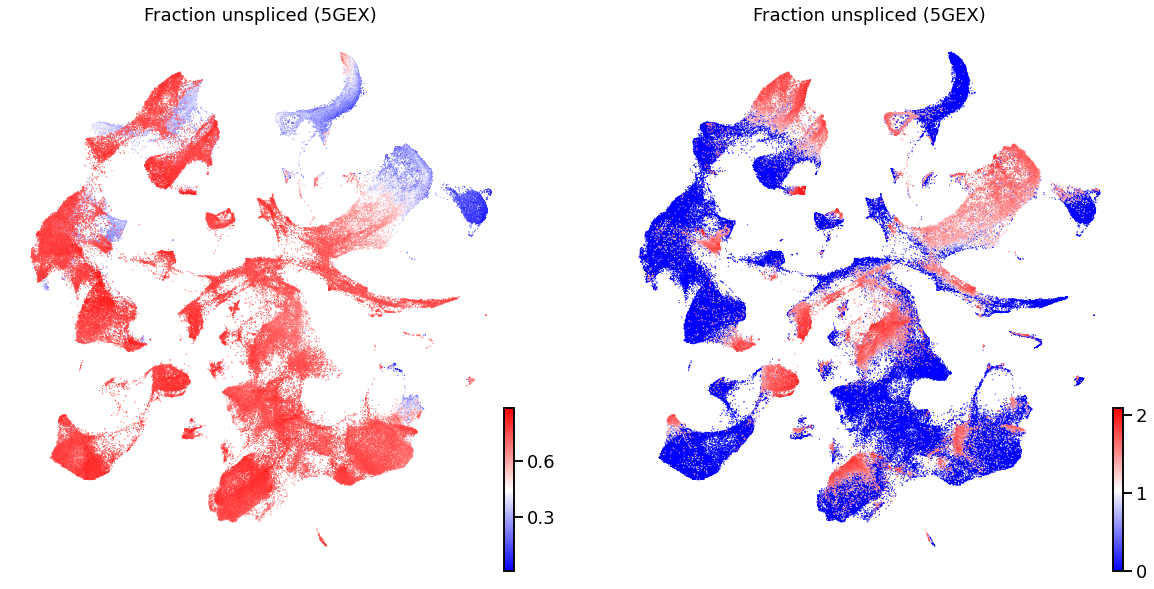

In [371]:
plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata_emb[adata_emb.obs['method'] == '5GEX'], color=['frac_unspliced', 'MKI67_expr'], size=5, cmap='bwr', title='Fraction unspliced (5GEX)')

In [302]:
adata_emb.obs['log10_n_counts'] = np.log10(adata_emb.obs['n_counts'])

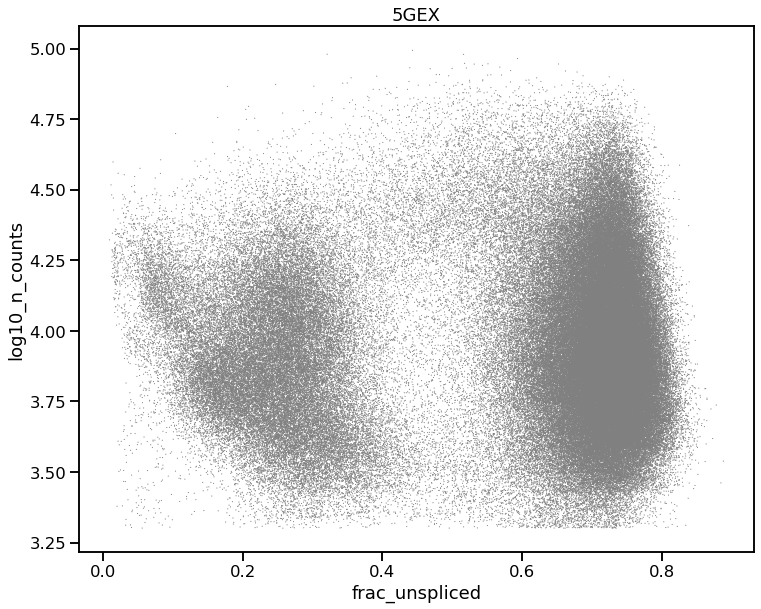

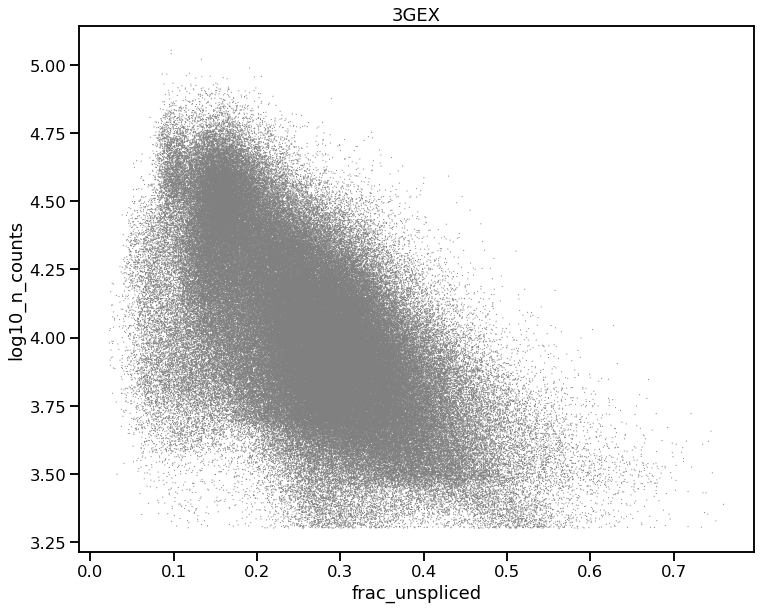

In [357]:
sc.pl.scatter(adata_emb[adata_emb.obs['method'] == '5GEX'], 'frac_unspliced','log10_n_counts', size=5, title='5GEX')
sc.pl.scatter(adata_emb[adata_emb.obs['method'] == '3GEX'], 'frac_unspliced','log10_n_counts', size=5, title='3GEX')

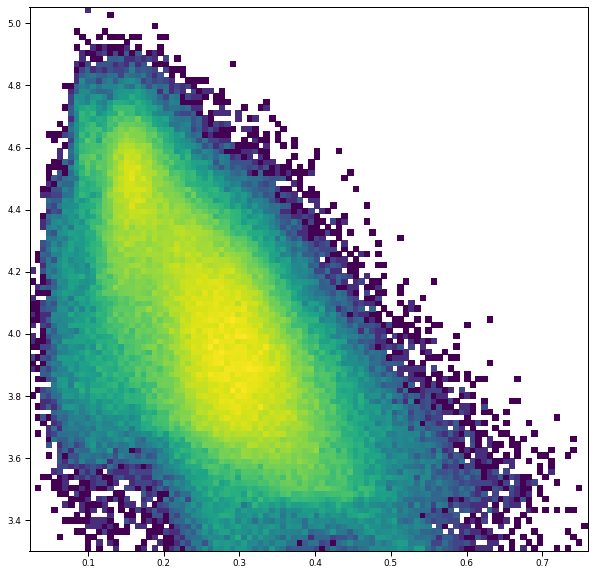

In [323]:
frac = adata_emb[adata_emb.obs['method'] == '3GEX'].obs['frac_unspliced'].dropna()
log_counts = adata_emb[adata_emb.obs['method'] == '3GEX'].obs['log10_n_counts'][frac.index]

import matplotlib
plt.hist2d(frac, log_counts, 
           bins=100, norm=matplotlib.colors.LogNorm());

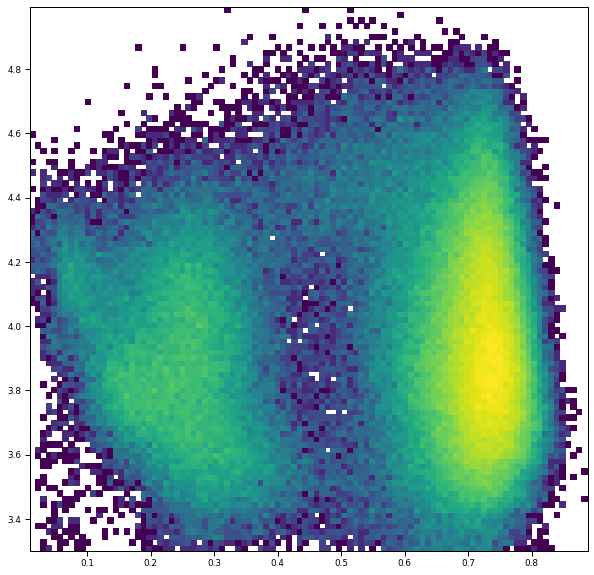

In [325]:
frac = adata_emb[adata_emb.obs['method'] == '5GEX'].obs['frac_unspliced'].dropna()
log_counts = adata_emb[adata_emb.obs['method'] == '5GEX'].obs['log10_n_counts'][frac.index]

import matplotlib
plt.hist2d(frac, log_counts, 
           bins=100, norm=matplotlib.colors.LogNorm());